In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "dummy_sampler"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.008883,0.042530,-0.042848,-0.021042,-0.039719,-0.002592,-0.018118,0.007207,127.0
1,-0.070900,-0.044642,-0.057941,-0.081414,-0.045599,-0.028871,-0.043401,-0.002592,0.001144,-0.005220,162.0
2,0.052606,-0.044642,-0.021295,-0.074528,-0.040096,-0.037639,-0.006584,-0.039493,-0.000609,-0.054925,131.0
3,-0.009147,0.050680,-0.018062,-0.033214,-0.020832,0.012152,-0.072854,0.071210,0.000271,0.019633,150.0
4,-0.052738,-0.044642,-0.009439,-0.005671,0.039710,0.044719,0.026550,-0.002592,-0.018118,-0.013504,59.0
5,-0.020045,-0.044642,0.004572,0.097616,0.005311,-0.020729,0.063367,-0.039493,0.012553,0.011349,48.0
6,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059473,-0.083920,134.0
7,-0.034575,-0.044642,-0.037463,-0.060757,0.020446,0.043466,-0.013948,-0.002592,-0.030751,-0.071494,128.0
8,0.012648,0.050680,0.035829,0.049415,0.053469,0.074155,-0.069172,0.145012,0.045601,0.048628,248.0
9,-0.023677,0.050680,-0.025607,0.042530,-0.053855,-0.047660,-0.021311,-0.039493,0.001144,0.019633,252.0


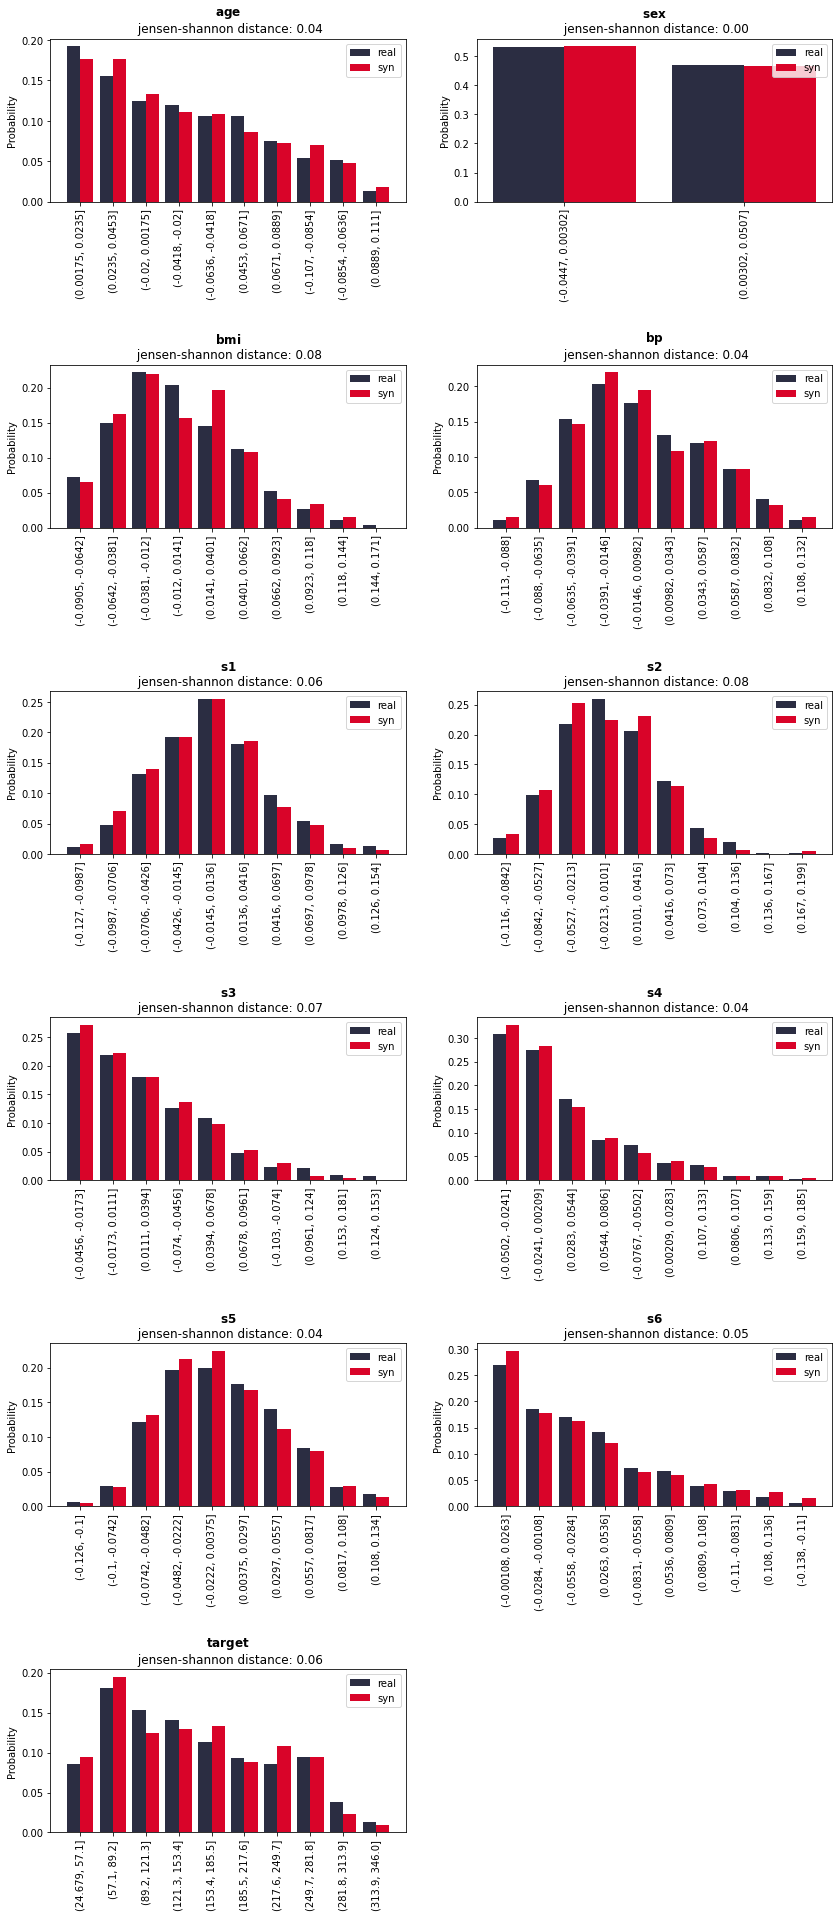

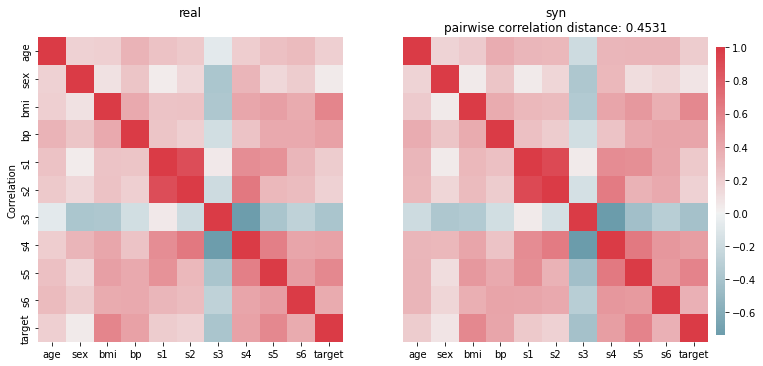

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : dummy_sampler


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.0
sanity.common_rows_proportion,0.626697,0.649321,0.637255,0.009298,0.635747,0.011312,3,0,0.01
sanity.avg_distance_nearest_neighbor,0.017371,0.026015,0.021656,0.00353,0.021581,0.004322,3,0,0.01
sanity.inlier_probability,0.961538,0.99095,0.980392,0.013364,0.988688,0.014706,3,0,0.01
sanity.outlier_probability,0.002262,0.004525,0.003017,0.001067,0.002262,0.001131,3,0,0.01
statistical.inverse_kl_divergence,0.9696,0.987485,0.980037,0.007601,0.983026,0.008942,3,0,0.02
statistical.kolmogorov_smirnov_test,0.962773,0.972851,0.9686,0.004263,0.970177,0.005039,3,0,0.01
statistical.chi_squared_test,0.813885,0.907774,0.846504,0.043355,0.817853,0.046944,3,0,0.02
statistical.maximum_mean_discrepancy,0.001967,0.002196,0.002044,0.000107,0.001969,0.000114,3,0,0.04
statistical.inverse_cdf_distance,1.716478,1.731676,1.725327,0.006451,1.727827,0.007599,3,0,5.44
